#THEORY

# 1. What is Boosting in Machine Learning?
Boosting is an ensemble learning technique that combines multiple weak learners (usually decision trees) to form a strong learner. It builds models sequentially, where each new model focuses on correcting the errors made by the previous ones. Boosting reduces both bias and variance, leading to improved model performance.

# 2. How does Boosting differ from Bagging?
- **Bagging** (Bootstrap Aggregating) builds multiple independent models in parallel and combines their predictions, typically by averaging or voting. It reduces variance.
- **Boosting** builds models sequentially, where each model learns from the errors of the previous one. It reduces both bias and variance.

# 3. What is the key idea behind AdaBoost?
AdaBoost (Adaptive Boosting) assigns higher weights to incorrectly classified samples so that subsequent weak learners focus more on those hard-to-classify examples. The final prediction is a weighted vote of all the weak learners.

# 4. Explain the working of AdaBoost with an example
1. Initialize equal weights to all data points.
2. Train a weak learner (e.g., decision stump).
3. Increase weights of misclassified points and decrease weights of correctly classified points.
4. Train the next weak learner on the updated weights.
5. Repeat for a predefined number of iterations or until performance is satisfactory.
6. Combine all weak learners using weighted majority voting.

**Example**:  
Assume we have a binary classification dataset. The first weak learner misclassifies some samples. In the next iteration, AdaBoost increases the weights of those misclassified samples. The second weak learner focuses more on those samples. This continues, and the final model is a weighted sum of all weak learners.

# 5. What is Gradient Boosting, and how is it different from AdaBoost?
Gradient Boosting builds models sequentially like AdaBoost, but it optimizes a **loss function** by fitting the new model to the **residual errors** (gradients) of the previous model. It uses gradient descent to minimize the loss, making it more flexible in handling various types of errors and tasks.

# 6. What is the loss function in Gradient Boosting?
The loss function in Gradient Boosting depends on the task:
- **Regression**: Mean Squared Error (MSE), Mean Absolute Error (MAE)
- **Classification**: Log Loss (Binary Cross Entropy)
The model minimizes this loss using gradient descent.

# 7. How does XGBoost improve over traditional Gradient Boosting?
- Uses second-order derivatives (Hessian) for more accurate gradient optimization.
- Implements regularization to avoid overfitting.
- Handles missing values efficiently.
- Performs parallelized tree construction.
- Includes techniques like early stopping and pruning for better generalization.

# 8. What is the difference between XGBoost and CatBoost?
| Feature | XGBoost | CatBoost |
|--------|----------|---------|
| Categorical Handling | Needs manual encoding | Automatically handles categorical features |
| Training Time | Fast | Fast and often faster on categorical data |
| Accuracy | High | High, especially on datasets with many categorical variables |
| Complexity | Requires more feature engineering | User-friendly with less preprocessing |

# 9. What are some real-world applications of Boosting techniques?
- Fraud detection in banking
- Customer churn prediction
- Recommender systems (e.g., Amazon, Netflix)
- Credit scoring and risk modeling
- Medical diagnosis
- Image classification
- Ranking in search engines (e.g., Bing uses RankNet/Boosting)

# 10. How does regularization help in XGBoost?
Regularization penalizes the complexity of the model (number of leaves, leaf weights), preventing overfitting. XGBoost uses L1 (Lasso) and L2 (Ridge) regularization on the leaf weights of trees, ensuring better generalization.

# 11. What are some hyperparameters to tune in Gradient Boosting models?
- `n_estimators`: Number of boosting rounds
- `learning_rate`: Shrinks contribution of each tree
- `max_depth`: Maximum depth of trees
- `min_samples_split`: Minimum samples required to split
- `subsample`: Fraction of samples to use per tree
- `colsample_bytree`: Fraction of features to consider per tree
- `gamma` (XGBoost): Minimum loss reduction to split
- `lambda`, `alpha`: L2 and L1 regularization terms

# 12. What is the concept of Feature Importance in Boosting?
Feature importance tells how useful each feature is in predicting the target. In boosting:
- Importance is measured by how often a feature is used to split and how much it reduces the loss.
- It helps in feature selection, model interpretation, and identifying influential variables.

# 13. Why is CatBoost efficient for categorical data?
CatBoost uses **ordered boosting** and **target statistics** to handle categorical variables natively without manual encoding. It reduces overfitting and handles high-cardinality categorical features efficiently, making it very effective for datasets with many categorical variables.


#PRACTICAL

In [1]:
# 14. Train an AdaBoost Classifier on a sample dataset and print model accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.868


In [2]:
# 15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 69.49501249302548


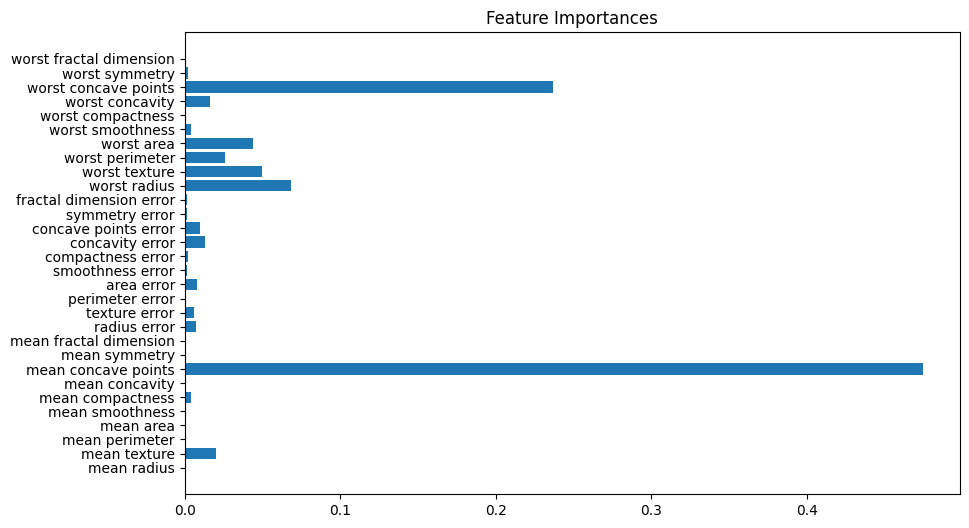

In [3]:
# 16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, model.feature_importances_)
plt.title("Feature Importances")
plt.show()


In [4]:
# 17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.86707107288374


In [5]:
# 18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gbc_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.958041958041958
Gradient Boosting Accuracy: 0.958041958041958


In [7]:
# 20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, xgb_pred))


MSE: 0.04561951383948326


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (20,) and arg 1 with shape (30,).

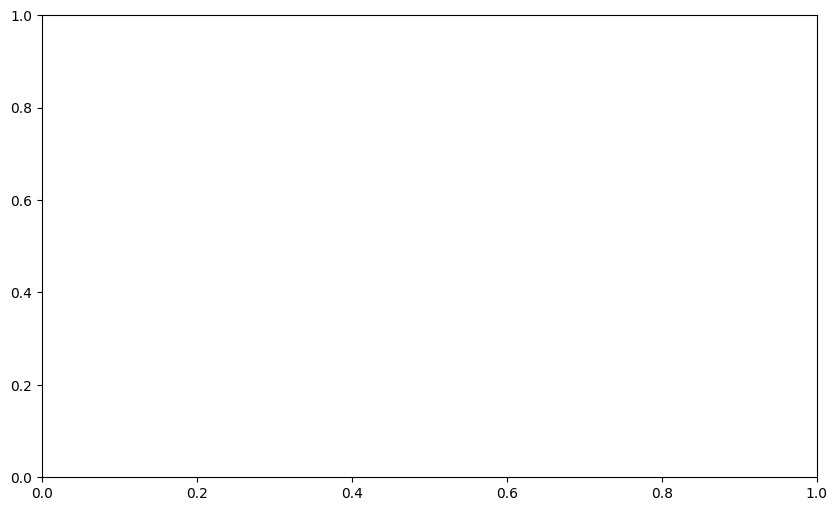

In [9]:
# 21. Train an AdaBoost Classifier and visualize feature importance
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), model.feature_importances_)
plt.title("AdaBoost Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


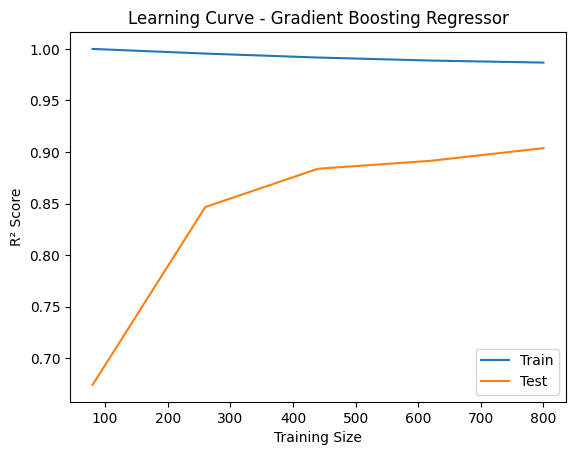

In [10]:
# 22. Train a Gradient Boosting Regressor and plot learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingRegressor(), X, y, cv=5, scoring='r2'
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test")
plt.title("Learning Curve - Gradient Boosting Regressor")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


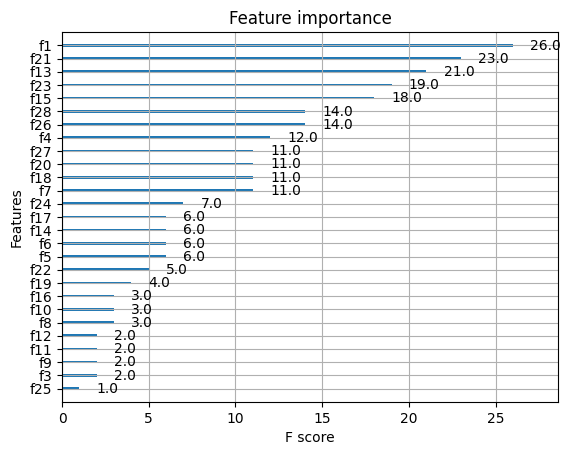

In [11]:
# 23. Train an XGBoost Classifier and visualize feature importance
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

from xgboost import plot_importance
plot_importance(xgb)
plt.show()


In [14]:
# 25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy
for n in [10, 50, 100, 200]:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"n_estimators={n}: Accuracy = {acc:.4f}")


n_estimators=10: Accuracy = 0.9720
n_estimators=50: Accuracy = 0.9580
n_estimators=100: Accuracy = 0.9790
n_estimators=200: Accuracy = 0.9790


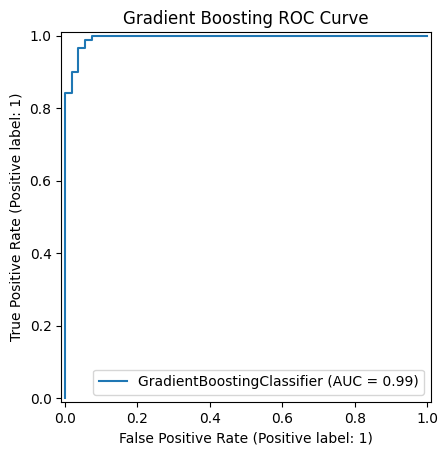

In [15]:
# 26. Train a Gradient Boosting Classifier and visualize the ROC curve
from sklearn.metrics import RocCurveDisplay

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
RocCurveDisplay.from_estimator(gb, X_test, y_test)
plt.title("Gradient Boosting ROC Curve")
plt.show()


In [16]:
# 27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
grid = GridSearchCV(XGBRegressor(), param_grid, scoring='neg_mean_squared_error', cv=3)
grid.fit(X_train, y_train)
print("Best Learning Rate:", grid.best_params_['learning_rate'])
print("Best MSE:", -grid.best_score_)


Best Learning Rate: 0.2
Best MSE: 0.051304460813601814


In [17]:
# 28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting
from sklearn.datasets import make_classification
X_imb, y_imb = make_classification(n_samples=1000, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, random_state=42)

model = CatBoostClassifier(verbose=0, class_weights=[1, 10])
model.fit(X_train, y_train)
print("F1 Score (with class weights):", f1_score(y_test, model.predict(X_test)))


NameError: name 'CatBoostClassifier' is not defined

In [18]:
# 29. Train an AdaBoost Classifier and analyze the effect of different learning rates
for lr in [0.01, 0.1, 0.5, 1.0]:
    model = AdaBoostClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Learning rate={lr}: Accuracy = {acc:.4f}")


Learning rate=0.01: Accuracy = 0.9040
Learning rate=0.1: Accuracy = 0.9360
Learning rate=0.5: Accuracy = 0.9360
Learning rate=1.0: Accuracy = 0.9480


In [19]:
# 30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss
from sklearn.datasets import load_iris
from sklearn.metrics import log_loss

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

model = XGBClassifier(objective='multi:softprob', num_class=3, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, y_pred_prob))


Log Loss: 0.009282532825768382


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
